In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
phishing_df = pd.read_csv('Phishing_Legitimate_full.csv')
phishing_df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


### Exploring the Data

In [3]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [4]:
phishing_df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
phishing_df['CLASS_LABEL'].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

There is an equal number of legitimate and phishing links present in the dataset.

In [6]:
from sklearn.feature_selection import mutual_info_classif

In [7]:
X = phishing_df.drop(columns = ['id', 'CLASS_LABEL'])
y = phishing_df['CLASS_LABEL']

In [15]:
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series

PctExtHyperlinks                      0.472390
PctExtResourceUrls                    0.294208
PctNullSelfRedirectHyperlinks         0.236425
PctExtNullSelfRedirectHyperlinksRT    0.212415
FrequentDomainNameMismatch            0.132119
NumNumericChars                       0.131043
ExtMetaScriptLinkRT                   0.123251
NumDash                               0.115584
SubmitInfoToEmail                     0.077057
NumDots                               0.063778
InsecureForms                         0.060176
PathLevel                             0.057102
PathLength                            0.054949
NumSensitiveWords                     0.044733
QueryLength                           0.043061
UrlLength                             0.041708
NumQueryComponents                    0.031547
AbnormalExtFormActionR                0.028905
HostnameLength                        0.024453
IframeOrFrame                         0.018821
NumAmpersand                          0.018408
PctExtResourc

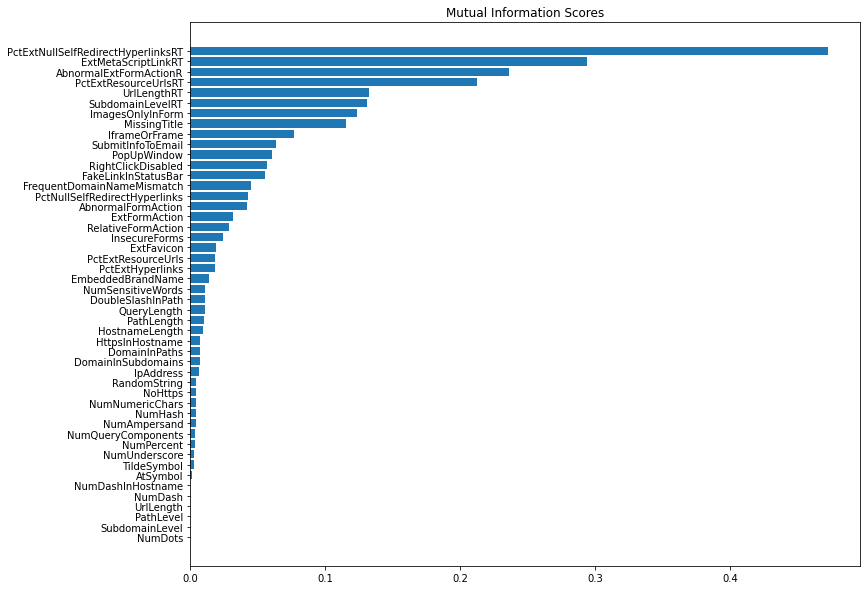

In [16]:
width = np.arange(len(mi_scores))

plt.figure(figsize=(12, 10))
plt.barh(width, np.sort(mi_scores))
plt.yticks(width, X.columns)
plt.title("Mutual Information Scores")

plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
def train_rfc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rfc = RandomForestClassifier(n_estimators=200, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    
    return accuracy, precision, recall, f1

In [34]:
n = np.count_nonzero(mi_scores)
features = mi_series.index.to_numpy()

y = phishing_df['CLASS_LABEL']
scores = []

for i in range(15, n, 1):
    top_n_features = features[:i]
    X = phishing_df[top_n_features]
    
    accuracy, precision, recall, f1 = train_rfc(X, y)
    scores.append([i, accuracy, precision, recall, f1])

In [38]:
results = pd.DataFrame(scores, columns=['num_features', 'accuracy', 'precision', 'recall', 'f1-score'])
results

,num_features,accuracy,precision,recall,f1-score
0,15,0.9752,0.977831,0.973207,0.975513
1,16,0.9752,0.977831,0.973207,0.975513
2,17,0.9764,0.979414,0.974016,0.976707
3,18,0.9776,0.980206,0.975571,0.977883
4,19,0.9780,0.980998,0.975591,0.978287
5,20,0.9776,0.980998,0.974823,0.977901
6,21,0.9788,0.983373,0.974882,0.979109
7,22,0.9780,0.982581,0.974097,0.978321
8,23,0.9780,0.980998,0.975591,0.978287
9,24,0.9776,0.981789,0.974077,0.977918


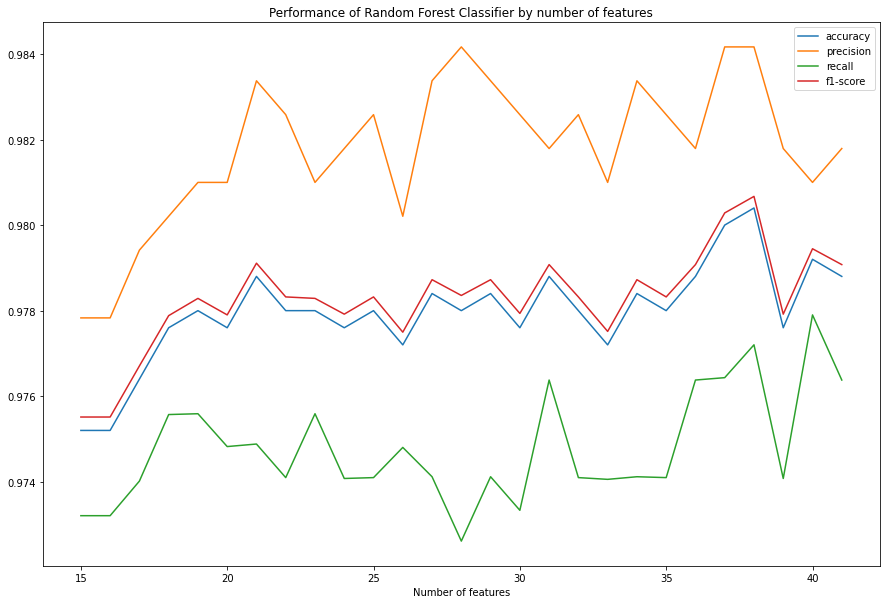

In [36]:
plt.figure(figsize=(15, 10))
plt.plot(results['num_features'], results['accuracy'], label='accuracy')
plt.plot(results['num_features'], results['precision'], label='precision')
plt.plot(results['num_features'], results['recall'], label='recall')
plt.plot(results['num_features'], results['f1-score'], label='f1-score')

plt.title('Performance of Random Forest Classifier by number of features')
plt.xlabel('Number of features')
plt.legend()
plt.show()

In [42]:
results['num_features'][results['accuracy'].argmax()]

38

In [43]:
results['num_features'][results['f1-score'].argmax()]

38

In [48]:
best_n = 38

X = phishing_df[features[:best_n]]
y = phishing_df['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [49]:
print(f'accuracy: {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

accuracy: 0.9804
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1237
           1       0.98      0.98      0.98      1263

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



In [52]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)